Step 1: Load and Inspect the Data

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('merch_sales.csv')

print(df)

# Dataset dimensions and column types
print("\nShape of the dataset:", df.shape)
print("\nData types:\n", df.dtypes)

# Summary stats
print("\nSummary Statistics:\n", df.describe())

# Check for missing/null values
print("\nMissing Values:\n", df.isnull().sum())


      Order ID  Order Date Product ID Product Category Buyer Gender  \
0       189440  2024-07-21     BF1543         Clothing         Male   
1       187385  2024-07-20     BF1543         Clothing         Male   
2       181844  2024-07-21     BF1544            Other       Female   
3       197934  2024-08-19     BF1544            Other         Male   
4       122470  2024-01-06     BF1545            Other       Female   
...        ...         ...        ...              ...          ...   
7389    136943  2023-12-10     BF1548         Clothing         Male   
7390    172276  2024-01-24     BF1546         Clothing       Female   
7391    160191  2023-12-19     BF1552        Ornaments         Male   
7392    195268  2023-12-07     BF1555            Other         Male   
7393    138160  2024-10-23     BF1544            Other       Female   

      Buyer Age Order Location International Shipping  Sales Price  \
0            30     New Jersey                     No          100   
1      

Step 2: Data Cleaning

In [3]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df["Order Date"])

# remove duplicates rows
df.drop_duplicates(inplace=True)

# Confirm changes
print("\nAfter Cleaning:")
print("duplicates:", df.duplicated().sum())
print("Nulls:\n", df.isnull().sum())


After Cleaning:
duplicates: 0
Nulls:
 Order ID                  0
Order Date                0
Product ID                0
Product Category          0
Buyer Gender              0
Buyer Age                 0
Order Location            0
International Shipping    0
Sales Price               0
Shipping Charges          0
Sales per Unit            0
Quantity                  0
Total Sales               0
Rating                    0
Review                    0
dtype: int64


Step 3: Descriptive Statistics

In [4]:
print(df.describe())

            Order ID                     Order Date    Buyer Age  Sales Price  \
count    7394.000000                           7394  7394.000000  7394.000000   
mean   159735.134028  2024-05-02 16:09:05.307005696    26.455504    55.165404   
min    120005.000000            2023-11-05 00:00:00    18.000000     9.000000   
25%    139895.750000            2024-02-02 00:00:00    22.000000    15.000000   
50%    159577.500000            2024-04-30 00:00:00    26.000000    65.000000   
75%    179869.750000            2024-07-31 00:00:00    31.000000    97.000000   
max    199994.000000            2024-11-04 00:00:00    35.000000   130.000000   
std     23040.247194                            NaN     5.208202    39.575614   

       Shipping Charges  Sales per Unit     Quantity  Total Sales       Rating  
count       7394.000000     7394.000000  7394.000000  7394.000000  7394.000000  
mean          14.633487       69.798891     1.668109   115.832026     3.499053  
min            0.000000    

In [5]:
# Categorical column distribution
print(df["Product Category"].value_counts())
print(df["Buyer Gender"].value_counts())

Product Category
Clothing     3704
Ornaments    2256
Other        1434
Name: count, dtype: int64
Buyer Gender
Male      5188
Female    2206
Name: count, dtype: int64


Step 4 Time Series(Monthly Sales)

In [6]:
import matplotlib.pyplot as plt

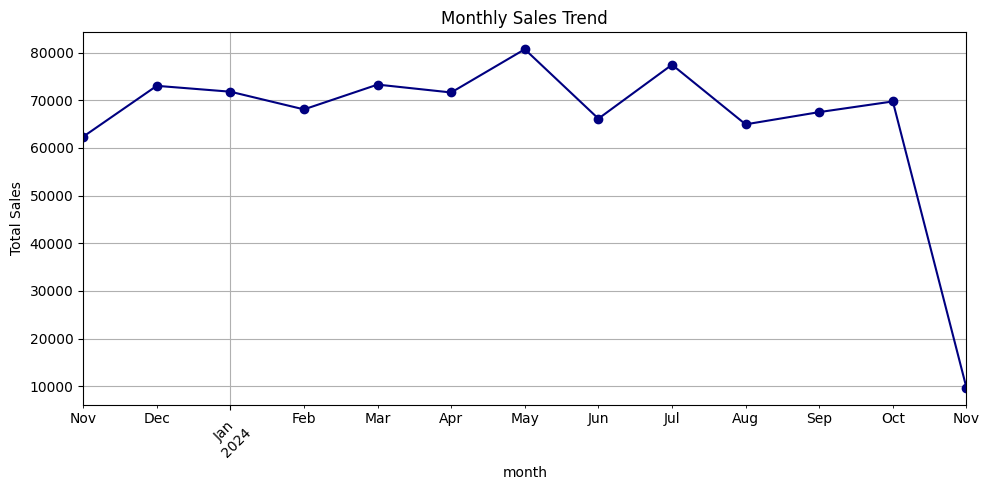

In [7]:
# Monthly Total sales
monthly_sales = df.set_index("Order Date").resample("ME")["Total Sales"].sum()

# Plot it
plt.figure(figsize=(10,5))
monthly_sales.plot(marker="o", color="navy")
plt.title("Monthly Sales Trend")
plt.xlabel("month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Step 5: Customer & Product Analysis

In [8]:
# top_products by total Quantity sold
top_products = df.groupby("Product ID")["Quantity"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Orders by Quantity Sold:\n",top_products)


# top_customers by total Purchase value
top_customers = df.groupby("Order ID")["Total Sales"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Orders by Total Sales:\n",top_customers)


Top 10 Orders by Quantity Sold:
 Product ID
BF1548    2421
BF1551    1586
BF1550    1273
BF1543    1220
BF1544    1219
BF1545    1023
BF1554     755
BF1549     628
BF1547     562
BF1546     555
Name: Quantity, dtype: int64

Top 10 Orders by Total Sales:
 Order ID
154896    1000
149381    1000
163330     850
192347     835
190781     825
194129     800
159528     800
183519     800
167726     790
154238     790
Name: Total Sales, dtype: int64


Step 6: Visualizations

In [9]:
import seaborn as sns

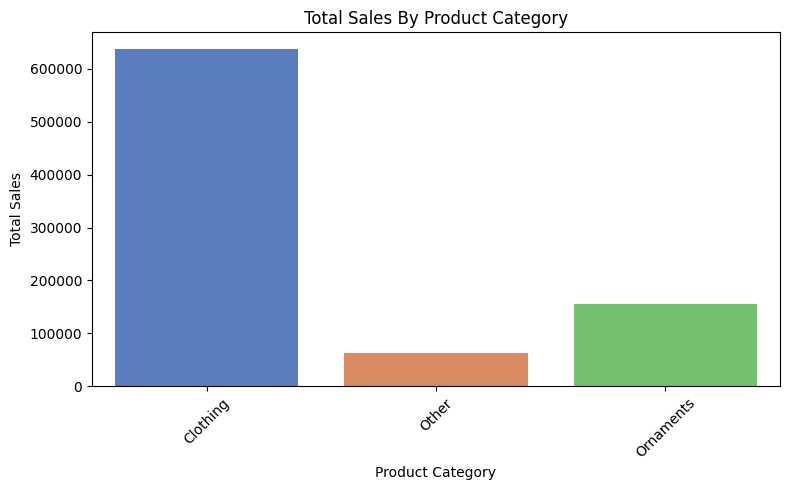

In [10]:
# Sales by Product Category
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="Product Category",y="Total Sales",estimator=sum,errorbar=None,
hue="Product Category", legend=False,palette="muted")
plt.xticks(rotation=45)
plt.title("Total Sales By Product Category")
plt.tight_layout()
plt.show()

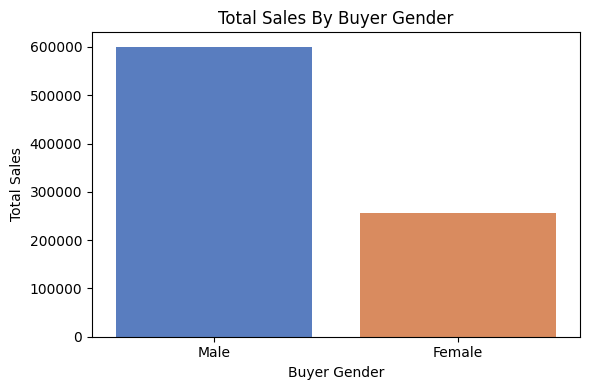

In [11]:
# Sales by Buyer Gender
plt.figure(figsize=(6,4))
sns.barplot(data=df,x="Buyer Gender",y="Total Sales",estimator=sum,errorbar=None,
hue="Buyer Gender", legend=False,palette="muted")
plt.title("Total Sales By Buyer Gender")
plt.tight_layout()
plt.show()

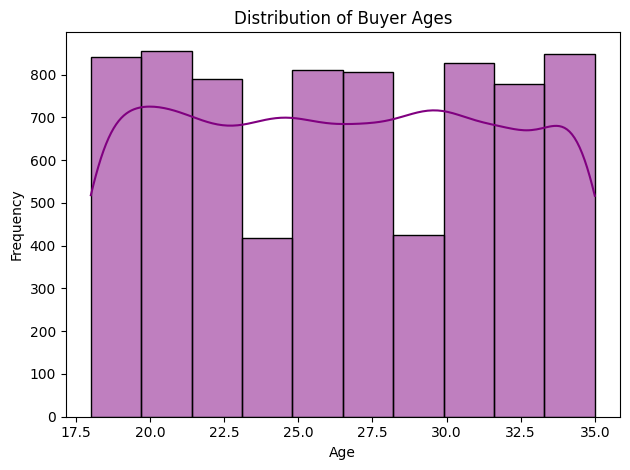

In [12]:
# Age Distribution of Buyers
plt.Figure(figsize=(10,5))
sns.histplot(df["Buyer Age"],bins=10, kde=True, color="purple")
plt.title("Distribution of Buyer Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

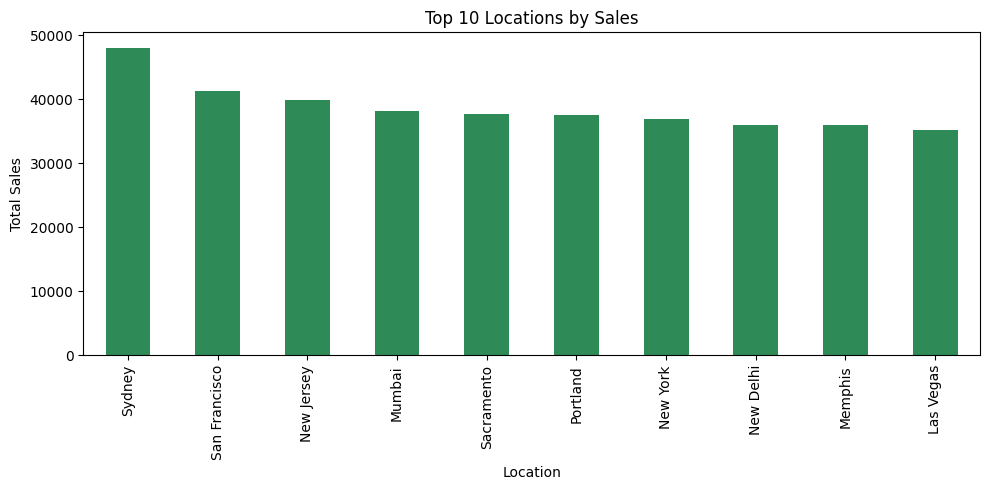

In [13]:
# Top 10 Locations by Sales
top_locations = df.groupby('Order Location')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_locations.plot(kind='bar', color='seagreen')
plt.title("Top 10 Locations by Sales")
plt.xlabel("Location")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


Step 7: Correlation Analysis

In [14]:
# Quantity VS Total Sales
Connection = df["Quantity"].corr(df["Total Sales"])
print(f"\nCorrelation between Quantity and Total Sales: {Connection:.2f}")


Correlation between Quantity and Total Sales: 0.63


In [15]:
print("🔸 Total Revenue Generated: ₹", round(df['Total Sales'].sum(), 2))

🔸 Total Revenue Generated: ₹ 856462


In [16]:
# Save cleaned file
df.to_csv("cleaned_merch_sales.csv", index=False)
print("💾 Cleaned data saved to 'cleaned_merch_sales.csv'.")


💾 Cleaned data saved to 'cleaned_merch_sales.csv'.


In [17]:
print("\n✅ EDA Completed Successfully!")



✅ EDA Completed Successfully!
